In [ ]:
# Brain Contour Masking
# Import Libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import torchvision.transforms as transforms
import torch

# Load Patient (010) .mha file
patient_072_adc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/1ADC_ss/MGHNICU_070-VISIT_01-ADC_ss.mha"
patient_275_adc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/1ADC_ss/MGHNICU_105-VISIT_01-ADC_ss.mha"
patient_440_adc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/1ADC_ss/MGHNICU_440-VISIT_01-ADC_ss.mha"
patient_010_adc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/1ADC_ss/MGHNICU_010-VISIT_01-ADC_ss.mha"

patient_072_zadc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/2Z_ADC/Zmap_MGHNICU_070-VISIT_01-ADC_smooth2mm_clipped10.mha"
patient_275_zadc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/2Z_ADC/Zmap_MGHNICU_105-VISIT_01-ADC_smooth2mm_clipped10.mha"
patient_440_zadc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/2Z_ADC/Zmap_MGHNICU_440-VISIT_01-ADC_smooth2mm_clipped10.mha"
patient_010_zadc = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/2Z_ADC/Zmap_MGHNICU_010-VISIT_01-ADC_smooth2mm_clipped10.mha"

patient_072_label = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/3LABEL/MGHNICU_070-VISIT_01_lesion.mha"
patient_275_label = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/3LABEL/MGHNICU_105-VISIT_01_lesion.mha"
patient_440_label = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/3LABEL/MGHNICU_440-VISIT_01_lesion.mha"
patient_010_label = "/Users/ananyashukla/Desktop/Brown@Research/lesion_segmentation/data_dir/BONBID2023_Train/3LABEL/MGHNICU_010-VISIT_01_lesion.mha"

# Loading and Reading Images by SimpleITK
image_adc_72, image_adc_275, image_adc_440, image_adc_010 = sitk.ReadImage(patient_072_adc), sitk.ReadImage(patient_275_adc), sitk.ReadImage(patient_440_adc), sitk.ReadImage(patient_010_adc)
image_zadc_72, image_zadc_275, image_zadc_440, image_zadc_010 = sitk.ReadImage(patient_072_zadc), sitk.ReadImage(patient_275_zadc), sitk.ReadImage(patient_440_zadc), sitk.ReadImage(patient_010_zadc)
image_label_72, image_label_275, image_label_440, image_label_010 = sitk.ReadImage(patient_072_label), sitk.ReadImage(patient_275_label), sitk.ReadImage(patient_440_label), sitk.ReadImage(patient_010_label)

image_array_adc_72, image_array_adc_275, image_array_adc_440, image_array_adc_010 = sitk.GetArrayFromImage(image_adc_72), sitk.GetArrayFromImage(image_adc_275), sitk.GetArrayFromImage(image_adc_440), sitk.GetArrayFromImage(image_adc_010)
image_array_zadc_72, image_array_zadc_275, image_array_zadc_440, image_array_zadc_010 = sitk.GetArrayFromImage(image_zadc_72), sitk.GetArrayFromImage(image_zadc_275), sitk.GetArrayFromImage(image_zadc_440), sitk.GetArrayFromImage(image_zadc_010)
image_array_label_72, image_array_label_275, image_array_label_440, image_array_label_010 = sitk.GetArrayFromImage(image_label_72), sitk.GetArrayFromImage(image_label_275), sitk.GetArrayFromImage(image_label_440), sitk.GetArrayFromImage(image_label_010)

image_clipped_adc_010 = "./data_dir/BONBID2023_Train/1ADC_ss_clipped/MGHNICU_010-VISIT_01-ADC_ss.mha"
image_clipped_adc_072 = "./data_dir/BONBID2023_Train/1ADC_ss_clipped/MGHNICU_072-VISIT_01-ADC_ss.mha"
image_clipped_adc_440 = "./data_dir/BONBID2023_Train/1ADC_ss_clipped/MGHNICU_440-VISIT_01-ADC_ss.mha"
image_array_clipped_adc_010, image_array_clipped_adc_072, image_array_clipped_adc_440 = sitk.GetArrayFromImage(sitk.ReadImage(image_clipped_adc_010)), sitk.GetArrayFromImage(sitk.ReadImage(image_clipped_adc_072)), sitk.GetArrayFromImage(sitk.ReadImage(image_clipped_adc_440))

Background Removal (Clipping)

Patient 72 ADC Shape: (48, 256, 256)
Patient 275 ADC Shape: (48, 256, 256)
Patient 440 ADC Shape: (20, 160, 160)


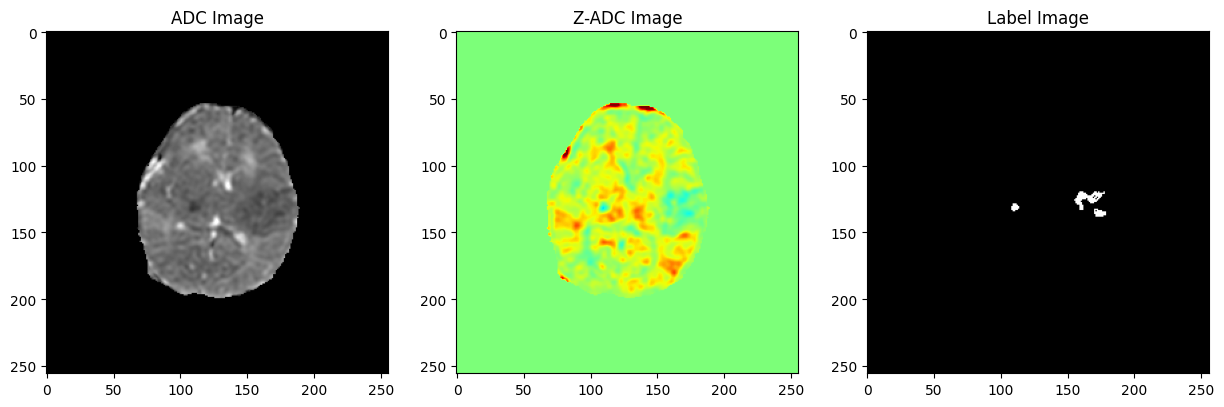

In [3]:
print(f'Patient 72 ADC Shape: {image_array_adc_72.shape}')
print(f'Patient 275 ADC Shape: {image_array_adc_275.shape}')
print(f'Patient 440 ADC Shape: {image_array_adc_440.shape}')

slice_adc = image_array_adc_72[image_array_adc_72.shape[0] // 2, :, :]
slice_zadc = image_array_zadc_72[image_array_zadc_72.shape[0] // 2, :, :]
slice_label = image_array_label_72[(image_array_label_72.shape[0] // 2), :, :]

# Displaying Images using Matplotlib
plt.figure(figsize = (15, 15))
plt.subplot(131)
# Reference: https://radiopaedia.org/blog/why-routine-measurement-of-adc-values-is-important
plt.imshow(slice_adc, cmap = 'gray', vmin = 0, vmax = 3400) # vmax = 3400
plt.title('ADC Image')
plt.subplot(132)
# Reference: https://www.biorxiv.org/content/10.1101/2023.06.30.546841v1.full
plt.imshow(slice_zadc, cmap = 'jet', vmin = -10, vmax = 10)
plt.title('Z-ADC Image')
plt.subplot(133)
plt.imshow(slice_label, cmap = 'gray', vmin = 0, vmax = 1)
plt.title('Label Image')
plt.show()

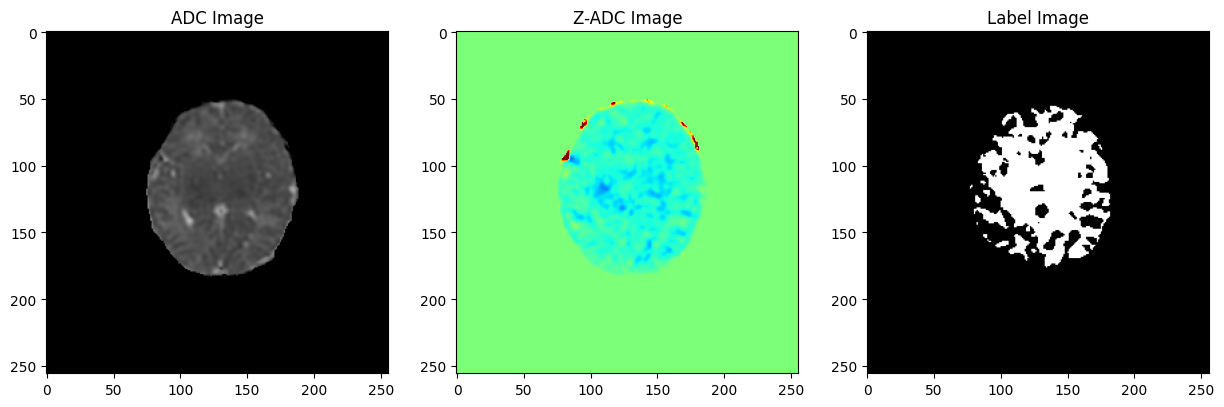

In [4]:
slice_adc = image_array_adc_275[image_array_adc_275.shape[0] // 2, :, :]
slice_zadc = image_array_zadc_275[image_array_zadc_275.shape[0] // 2, :, :]
slice_label = image_array_label_275[(image_array_label_275.shape[0] // 2), :, :]

# Displaying Images using Matplotlib
plt.figure(figsize = (15, 15))
plt.subplot(131)
# Reference: https://radiopaedia.org/blog/why-routine-measurement-of-adc-values-is-important
plt.imshow(slice_adc, cmap = 'gray', vmin = 0, vmax = 3400) # vmax = 3400
plt.title('ADC Image')
plt.subplot(132)
# Reference: https://www.biorxiv.org/content/10.1101/2023.06.30.546841v1.full
plt.imshow(slice_zadc, cmap = 'jet', vmin = -10, vmax = 10)
plt.title('Z-ADC Image')
plt.subplot(133)
plt.imshow(slice_label, cmap = 'gray', vmin = 0, vmax = 1)
plt.title('Label Image')
plt.show()

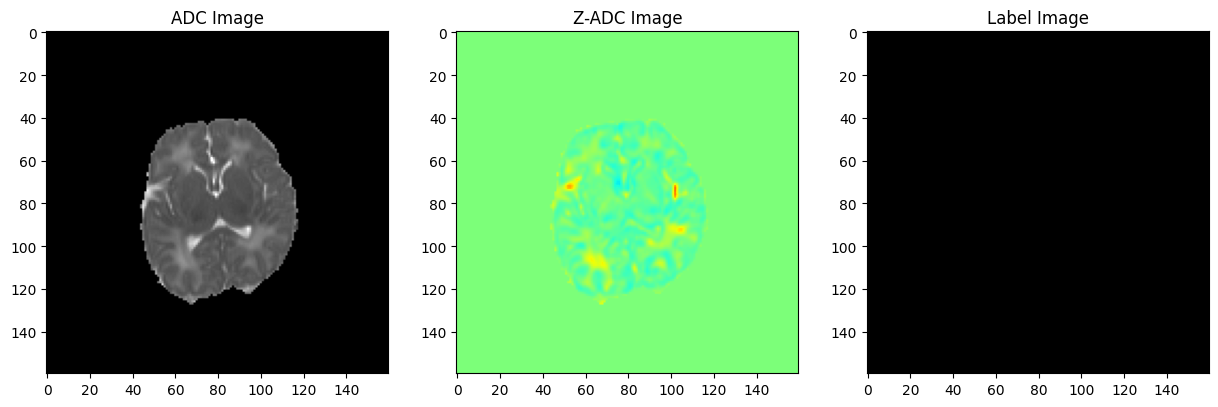

In [5]:
slice_adc = image_array_adc_440[image_array_adc_440.shape[0] // 2, :, :]
slice_zadc = image_array_zadc_440[image_array_zadc_440.shape[0] // 2, :, :]
slice_label = image_array_label_440[(image_array_label_440.shape[0] // 2), :, :]

# Displaying Images using Matplotlib
plt.figure(figsize = (15, 15))
plt.subplot(131)
# Reference: https://radiopaedia.org/blog/why-routine-measurement-of-adc-values-is-important
plt.imshow(slice_adc, cmap = 'gray', vmin = 0, vmax = 3400) # vmax = 3400
plt.title('ADC Image')
plt.subplot(132)
# Reference: https://www.biorxiv.org/content/10.1101/2023.06.30.546841v1.full
plt.imshow(slice_zadc, cmap = 'jet', vmin = -10, vmax = 10)
plt.title('Z-ADC Image')
plt.subplot(133)
plt.imshow(slice_label, cmap = 'gray', vmin = 0, vmax = 1)
plt.title('Label Image')
plt.show()

In [6]:
# Looking into the Array Values (ADC)
print("Patient 72")
print(image_array_adc_72.shape, end='\n\n')

# Looking into the Array Values (ADC)
print(f'Mimimum ADC Value: {image_array_adc_72.min()}')
print(f'Maximum ADC Value: {image_array_adc_72.max()}', end='\n\n')

# Looking into the Array Values (Z-ADC)
print(f'Mimimum Z-ADC Value: {image_array_zadc_72.min()}')
print(f'Maximum Z-ADC Value: {image_array_zadc_72.max()}', end='\n\n')

# Number of Pixels with Negative ADC Values
print(f'Number of Pixels with Negative ADC Values: {np.sum(image_array_adc_72 < 0)}', end='\n\n')

# Number of Pixels with Negative ADC Values per Slice
for i in range(image_array_adc_72.shape[0]):
    print(f'Number of Pixels with Negative ADC Values in Slice {i}: {np.sum(image_array_adc_72[i, :, :] < 0)}')

Patient 72
(48, 256, 256)

Mimimum ADC Value: -1102.4000244140625
Maximum ADC Value: 4528.0

Mimimum Z-ADC Value: -5.110559940338135
Maximum Z-ADC Value: 10.0

Number of Pixels with Negative ADC Values: 614

Number of Pixels with Negative ADC Values in Slice 0: 0
Number of Pixels with Negative ADC Values in Slice 1: 0
Number of Pixels with Negative ADC Values in Slice 2: 0
Number of Pixels with Negative ADC Values in Slice 3: 0
Number of Pixels with Negative ADC Values in Slice 4: 0
Number of Pixels with Negative ADC Values in Slice 5: 0
Number of Pixels with Negative ADC Values in Slice 6: 0
Number of Pixels with Negative ADC Values in Slice 7: 0
Number of Pixels with Negative ADC Values in Slice 8: 3
Number of Pixels with Negative ADC Values in Slice 9: 95
Number of Pixels with Negative ADC Values in Slice 10: 93
Number of Pixels with Negative ADC Values in Slice 11: 96
Number of Pixels with Negative ADC Values in Slice 12: 62
Number of Pixels with Negative ADC Values in Slice 13: 77

In [7]:
# Minimum and Maximum ADC Value (1ADC_ss)
def get_min_max_adc_values(directory):
    min_adc_value = float('inf')
    max_adc_value = float('-inf')
    
    for filename in os.listdir(directory):
        if filename.endswith('.mha'):
            file_path = os.path.join(directory, filename)
            image = sitk.ReadImage(file_path)
            image_array = sitk.GetArrayFromImage(image)
            
            current_min = image_array.min()
            current_max = image_array.max()
            
            if current_min < min_adc_value:
                min_adc_value = current_min
            if current_max > max_adc_value:
                max_adc_value = current_max
    
    return min_adc_value, max_adc_value

directory = 'data_dir/BONBID2023_Train/1ADC_ss'
min_adc_value, max_adc_value = get_min_max_adc_values(directory)

print("Across all Patients:")
print(f"Minimum ADC Value: {min_adc_value}")
print(f"Maximum ADC Value: {max_adc_value}")

Across all Patients:
Minimum ADC Value: -4528.0
Maximum ADC Value: 5148.0


In [8]:
# Number of Unique Pixels in all ADC Maps (1ADC_ss) with ADC Values as Negative
print("Total Number of Unique Pixels with Negative ADC Values in all ADC Maps (1ADC_ss):", end='\n\n')
dir = 'data_dir/BONBID2023_Train/1ADC_ss'
count = 0

def get_min_pixels(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.mha'):
            file_path = os.path.join(directory, filename)
            image = sitk.ReadImage(file_path)
            image_array = sitk.GetArrayFromImage(image)

            # Number of Negative Pixels in the Image
            neg = np.sum(image_array < 0)
            # Update Global Count
            print(f"Number of Negative Pixels in {filename}: {neg}")

            global count
            count += neg

    return count

neg_count = get_min_pixels(dir)
print(f"Total Number of Negative Pixels: {neg_count}")

Total Number of Unique Pixels with Negative ADC Values in all ADC Maps (1ADC_ss):

Number of Negative Pixels in MGHNICU_455-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_336-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_209-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_014-VISIT_01-ADC_ss.mha: 11
Number of Negative Pixels in MGHNICU_454-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_405-VISIT_01-ADC_ss.mha: 2
Number of Negative Pixels in MGHNICU_015-VISIT_01-ADC_ss.mha: 60
Number of Negative Pixels in MGHNICU_457-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_178-VISIT_01-ADC_ss.mha: 445
Number of Negative Pixels in MGHNICU_456-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_449-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_215-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_362-VISIT_01-ADC_ss.mha: 0
Number of Negative Pixels in MGHNICU_448-VISIT_01-ADC_ss.mha: 0
Number of Negativ

In [9]:
# Slice with Maximum Number of Negative Pixels in all ADC Maps (1ADC_ss)
print("Slice with Maximum Number of Negative Pixels in all ADC Maps (1ADC_ss):", end='\n\n')
def per_patient_slice_with_max_neg(directory):
    for filename in os.listdir(directory):
        if filename.endswith('.mha'):
            file_path = os.path.join(directory, filename)
            image = sitk.ReadImage(file_path)
            image_array = sitk.GetArrayFromImage(image)
            max_neg = 0
            slice_index = 0
            for i in range(image_array.shape[0]):
                slice = image_array[i, :, :]
                neg = np.sum(slice < 0)
                if neg > max_neg:
                    max_neg = neg
                    slice_index = i

            print(f"Maximum Number of Negative Pixels in {filename} at Slice {slice_index}: {max_neg}")

per_patient_slice_with_max_neg(dir)



Slice with Maximum Number of Negative Pixels in all ADC Maps (1ADC_ss):

Maximum Number of Negative Pixels in MGHNICU_455-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Number of Negative Pixels in MGHNICU_336-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Number of Negative Pixels in MGHNICU_209-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Number of Negative Pixels in MGHNICU_014-VISIT_01-ADC_ss.mha at Slice 10: 4
Maximum Number of Negative Pixels in MGHNICU_454-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Number of Negative Pixels in MGHNICU_405-VISIT_01-ADC_ss.mha at Slice 4: 1
Maximum Number of Negative Pixels in MGHNICU_015-VISIT_01-ADC_ss.mha at Slice 10: 16
Maximum Number of Negative Pixels in MGHNICU_457-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Number of Negative Pixels in MGHNICU_178-VISIT_01-ADC_ss.mha at Slice 6: 85
Maximum Number of Negative Pixels in MGHNICU_456-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Number of Negative Pixels in MGHNICU_449-VISIT_01-ADC_ss.mha at Slice 0: 0
Maximum Nu

ADC/ZADC Value Clipping

Text(0.5, 1.0, 'Label Image')

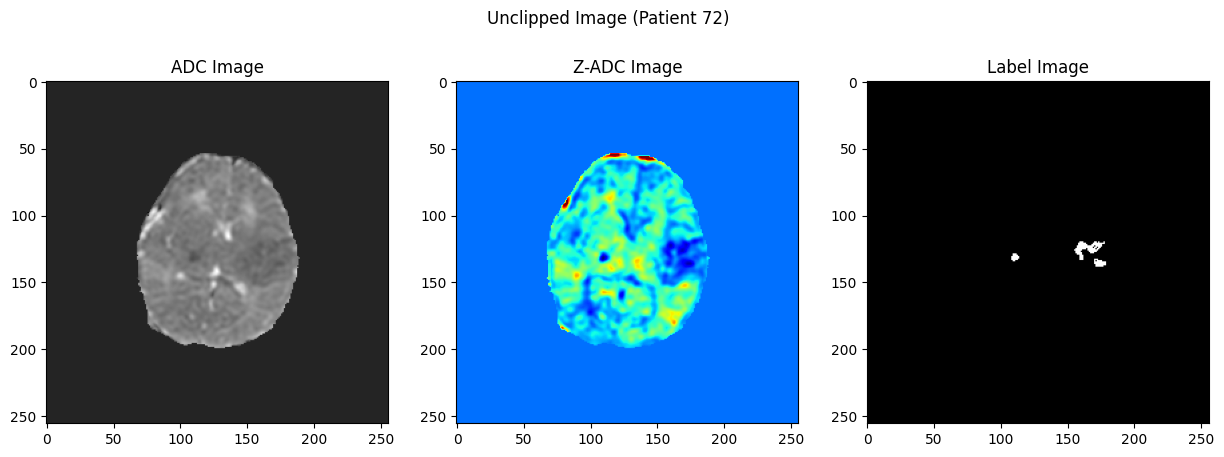

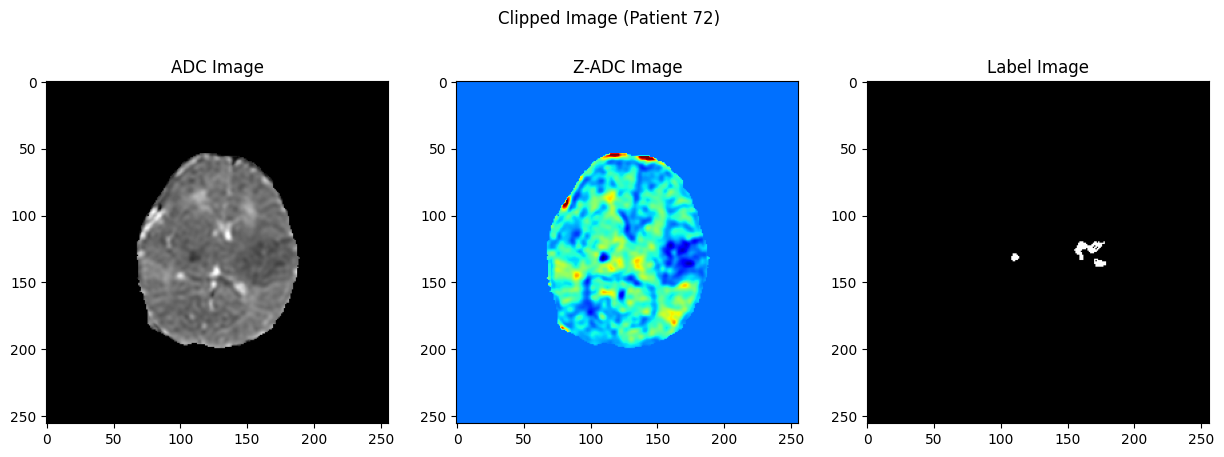

In [11]:
slice_adc = image_array_adc_72[image_array_adc_72.shape[0] // 2, :, :]
slice_zadc = image_array_zadc_72[image_array_zadc_72.shape[0] // 2, :, :]
slice_label = image_array_label_72[(image_array_label_72.shape[0] // 2), :, :]

# Displaying Unclipped Images using Matplotlib
plt.figure(figsize = (15, 5))
plt.suptitle('Unclipped Image (Patient 72)')
plt.subplot(131)
plt.imshow(slice_adc, cmap = 'gray')
plt.title('ADC Image')
plt.subplot(132)
plt.imshow(slice_zadc, cmap = 'jet')
plt.title('Z-ADC Image')
plt.subplot(133)
plt.imshow(slice_label, cmap = 'gray')
plt.title('Label Image')

slice_adc_cliped = np.clip(slice_adc, 0, 3400)
slice_zadc_cliped = np.clip(slice_zadc, -10, 10)
slice_label_cliped = np.clip(slice_label, 0, 1)

# Displaying Unclipped Images using Matplotlib
plt.figure(figsize = (15, 5))
plt.suptitle('Clipped Image (Patient 72)')
plt.subplot(131)
plt.imshow(slice_adc_cliped, cmap = 'gray')
plt.title('ADC Image')
plt.subplot(132)
plt.imshow(slice_zadc_cliped, cmap = 'jet')
plt.title('Z-ADC Image')
plt.subplot(133)
plt.imshow(slice_label_cliped, cmap='gray')
plt.title('Label Image')

In [12]:
'''
Function: 
clip_dir(directory) : Clipping ADC Images between [0, 3400] from dir(1ADC_ss)

Input: Directory (1ADC_ss) [.npy, .mha file type]
Output: Directory (1ADC_ss_clipped) [.npy, .mha file type] with Clipped ADC Images between [0, 3400]
'''

# Clipping Function
def clip_dir(in_directory, out_directory):
    if not os.path.exists(out_directory):
        os.makedirs(out_directory)

    for filename in os.listdir(directory):
        if filename.endswith('.npy'):
            file_path = os.path.join(directory, filename)
            image = np.load(file_path)
            image_clipped = np.clip(image, 0, 3400)
            np.save(f'data_dir/BONBID2023_Train/1ADC_ss_clipped/{filename}', image_clipped)

        elif filename.endswith('.mha'):
            file_path = os.path.join(directory, filename)
            image = sitk.ReadImage(file_path)
            image_array = sitk.GetArrayFromImage(image)
            image_clipped = np.clip(image_array, 0, 3400)
            image_clipped = sitk.GetImageFromArray(image_clipped)
            sitk.WriteImage(image_clipped, f'data_dir/BONBID2023_Train/1ADC_ss_clipped/{filename}')

# Clipping ADC Images
input_directory = 'data_dir/BONBID2023_Train/1ADC_ss'
output_directory = 'data_dir/BONBID2023_Train/1ADC_ss_clipped'
clip_dir(input_directory, output_directory)

Min-Max Normalisation

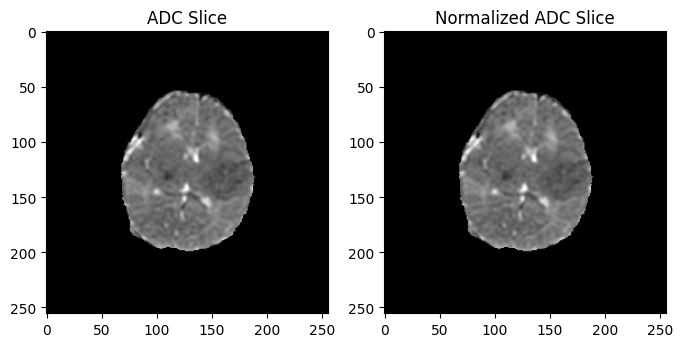

In [16]:
# 1. Min-Max Normalization
adc_min, adc_max = slice_adc_cliped.min(), slice_adc_cliped.max()

slice_adc_normalized = (slice_adc_cliped - adc_min) / (adc_max - adc_min)

# Plot Normalized Slices
fig, axes = plt.subplots(1, 2, figsize = (8, 8))
axes[0].imshow(slice_adc_cliped, cmap = 'gray')
axes[0].set_title('ADC Slice')
axes[1].imshow(slice_adc_normalized, cmap = 'gray')
axes[1].set_title('Normalized ADC Slice')
plt.show()

Z-Score Normalisation

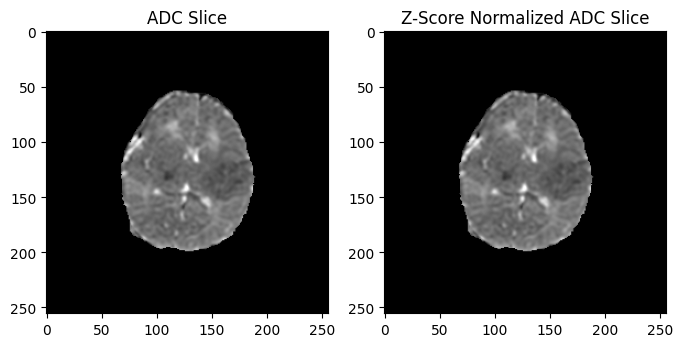

In [15]:
# 2. Z-Score Normalization
adc_mean, adc_std = slice_adc_cliped.mean(), slice_adc_cliped.std()

slice_adc_zscore = (slice_adc_cliped - adc_mean) / adc_std

# Plot Z-Score Normalized Slices
fig, axes = plt.subplots(1, 2, figsize=(8,8))
# Original ADC and ZADC slices
axes[0].imshow(slice_adc_cliped, cmap='gray')
axes[0].set_title('ADC Slice')
axes[1].imshow(slice_adc_zscore, cmap='gray')
axes[1].set_title('Z-Score Normalized ADC Slice')
plt.show()

In [ ]:
'''
Min-Max Normalization Function
Input: Image
Output: Normalized Image between [0, 1]
'''

def min_max_normalization(image):
    min_val, max_val = image.min(), image.max()
    return (image - min_val) / (max_val - min_val)

Volume Calculation

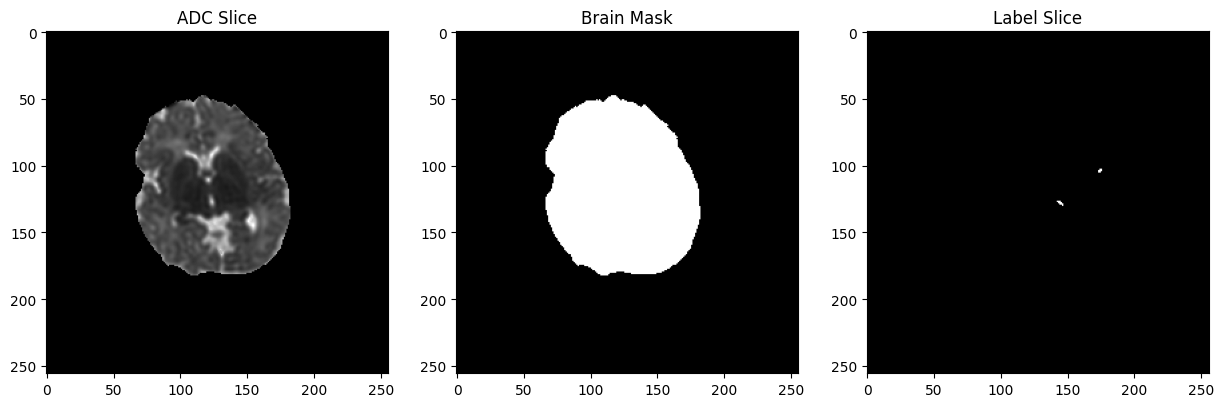

Brain Volume: 12276
Lesion Volume: 17.0
Lesion Volume Percentage: 0.13848159009449332


In [ ]:
adc_72_clipped = "./data_dir/BONBID2023_Train/1ADC_ss_clipped/MGHNICU_072-VISIT_01-ADC_ss.mha"
adc_72_clipped_array = sitk.GetArrayFromImage(sitk.ReadImage(adc_72_clipped))
brain_mask = np.where((slice >= 1) & (slice <= 3400), 1, 0)

# Plot the ADC Slice, Brain Mask and Label Slice
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(adc_72_clipped_array[20, :, :], cmap='gray')
axes[0].set_title("ADC Slice")
axes[1].imshow(brain_mask, cmap='gray')
axes[1].set_title("Brain Mask")
axes[2].imshow(image_array_label_72[20, :, :], cmap='gray')
axes[2].set_title("Label Slice")
plt.show()

brain_vol = np.sum(brain_mask)
print(f"Brain Volume: {brain_vol}")

lesion_vol = np.sum(image_array_label_72[20, :, :])
print(f"Lesion Volume: {lesion_vol}")

lesion_vol_per = lesion_vol / brain_vol * 100
print(f"Lesion Volume Percentage: {lesion_vol_per}")


In [39]:
'''
Per Patient and Per Slice Lesion Volume Calculation
1. per_slice_lesion_volume(

From the ADC Map of each Slice per Patient, we calculate the Total Area of Brain Tissue by Thresholding the ADC Map
From the Label Map of each Slice per Patient, we calculate the Total Area of Lesion Tissue (1 - Lesion and 0 - Non-Lesion), which can be from the Ground Truth or the Predicted Lesion Mask
Now, we can calculate the Lesion Volume Percentage per Slice by dividing the Total Area of Lesion Tissue by the Total Area of Brain Tissue

2. per_patient_lesion_volume() Function
For the per Patient Lesion Volume Calculation, we sum the Lesion Volume Percentage per Slice and divide it by the Total Area of Brain Tissue across all Slices

Input: ADC Map, Label Map (.npy file)
Output: Lesion Volume Percentage per Slice and per Patient

! Assumption: Total Brain Tissue Area is calculated from ADC Maps and .npy files is the file format
'''
def per_patient_lesion_volume(image_adc, image_label):
    brain_volume_per_slice = []
    lesion_volume_per_slice = []
    lesion_volume_percentage_per_slice = []

    for i in range(image_adc.shape[0]):
        lesion_volume_percentage, brain_volume, lesion_volume = per_slice_lesion_volume(image_adc[i, :, :], image_label[i, :, :])
        brain_volume_per_slice.append(brain_volume)
        lesion_volume_per_slice.append(lesion_volume)
        lesion_volume_percentage_per_slice.append(lesion_volume_percentage)

    # Per Patient Lesion Volume Calculation
    brain_volume_per_patient = np.sum(brain_volume_per_slice)
    lesion_volume_per_patient = np.sum(lesion_volume_per_slice)
    lesion_volume_percentage_per_patient = (lesion_volume_per_patient / brain_volume_per_patient) * 100

    return lesion_volume_percentage_per_patient

def per_slice_lesion_volume(image_adc_slice, label_slice):
    brain_mask = make_brain_mask(image_adc_slice, lower_bound=1, upper_bound=3400)

    # Brain Volume Calculation
    brain_volume = np.sum(brain_mask)
    # Lesion Volume Calculation
    lesion_volume = np.sum(label_slice)
    # Per Slice Lesion Volume Percentage
    lesion_volume_percentage = (lesion_volume / brain_volume) * 100

    return lesion_volume_percentage, brain_volume, lesion_volume

def make_brain_mask(image_adc_slice, lower_bound = 1, upper_bound = 3400):
    brain_mask = np.where((image_adc_slice >= lower_bound) & (image_adc_slice <= upper_bound), 1, 0)
    return brain_mask


Resampling (Reflective Padding)

In [ ]:
# Resample Images to 256 x 256 x S (where, S is the Number of Slices ∈ [23, 64]) using Zero Padding, Reflective Padding and Replicate Padding
def zero_padding(arr):
    """
    Applying Zero Padding to Resample to 256 x 256 x D
    
    Parameters: arr (numpy.ndarray): Input array of shape (D, H, W), where D is the number of slices
    Returns: numpy.ndarray: Padded array of shape (S, 256, 256)
    """
    # Input Array Shape
    D, H, W = arr.shape
    target_size = 256

    # Calculate Padding for required Height and Width
    pad_height = max(0, target_size - H)
    pad_width = max(0, target_size - W)

    padded_arr = np.pad(arr, ((0, 0), (pad_height // 2, pad_height - pad_height // 2), (pad_width // 2, pad_width - pad_width // 2)), mode='constant', constant_values=0)
    
    return padded_arr

def reflective_padding(arr):
    """
    Applying Reflective Padding to Resample to 256 x 256 x D

    Parameters: arr (numpy.ndarray): Input array of shape (D, H, W), where D is the number of slices
    Returns: numpy.ndarray: Padded array of shape (S, 256, 256)
    """
    # Input Array Shape
    D, H, W = arr.shape
    target_size = 256

    # Calculate Padding for required Height and Width
    pad_height = max(0, target_size - H)
    pad_width = max(0, target_size - W)

    padded_arr = np.pad(arr, ((0, 0), (pad_height // 2, pad_height - pad_height // 2), (pad_width // 2, pad_width - pad_width // 2)), mode='reflect')

    return padded_arr

def replicate_padding(arr):
    """
    Applying Replicate Padding to Resample to 256 x 256 x D

    Parameters: arr (numpy.ndarray): Input array of shape (D, H, W), where D is the number of slices
    Returns: numpy.ndarray: Padded array of shape (S, 256, 256)
    """
    # Input Array Shape
    D, H, W = arr.shape
    target_size = 256

    # Calculate Padding for required Height and Width
    pad_height = max(0, target_size - H)
    pad_width = max(0, target_size - W)

    padded_arr = np.pad(arr, ((0, 0), (pad_height // 2, pad_height - pad_height // 2), (pad_width // 2, pad_width - pad_width // 2)), mode='edge')

    return padded_arr

Patient 10 ADC Shape: (23, 128, 128)
Patient 72 ADC Shape: (45, 256, 256)
Patient 440 ADC Shape: (20, 160, 160)
Patient 10 ADC Zero Padded Shape: (23, 256, 256)
Patient 72 ADC Zero Padded Shape: (45, 256, 256)
Patient 440 ADC Zero Padded Shape: (20, 256, 256)


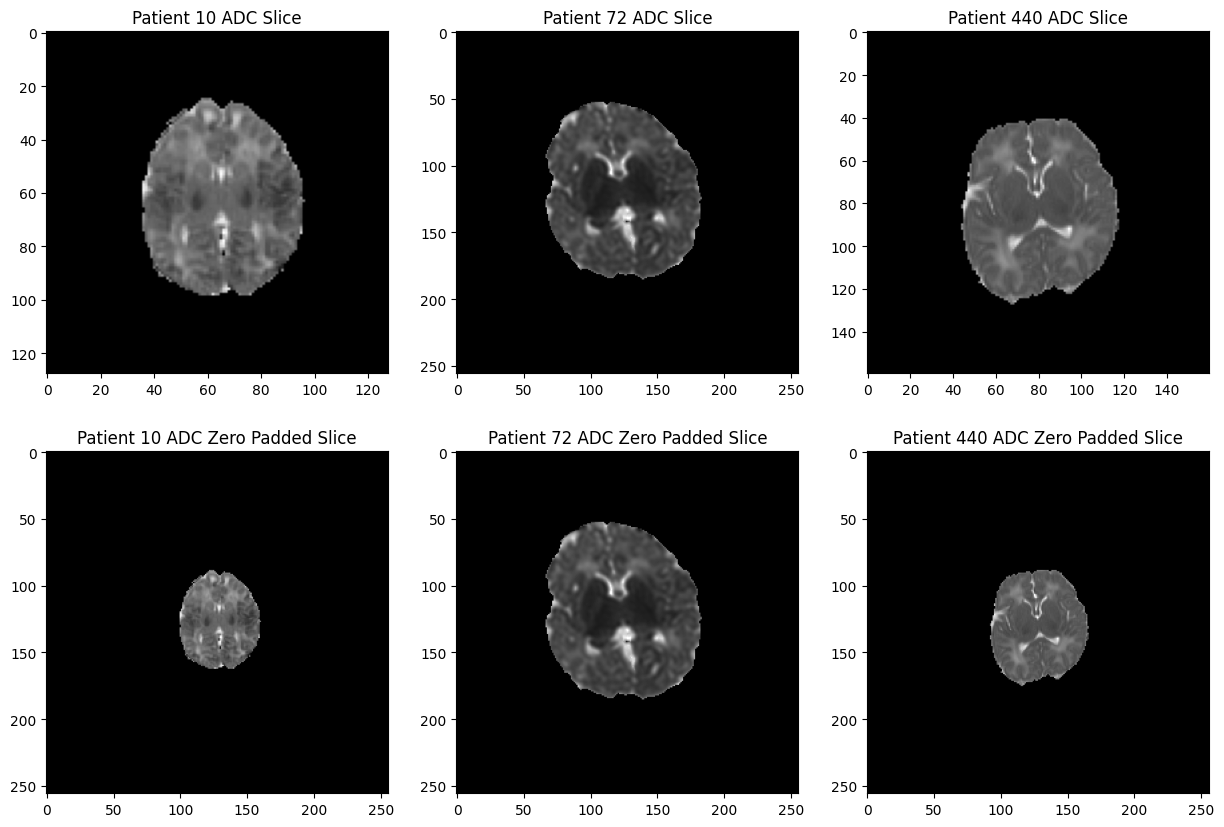

In [ ]:
# Zero Padding
print(f'Patient 10 ADC Shape: {image_array_adc_010.shape}')
print(f'Patient 72 ADC Shape: {image_array_clipped_adc_072.shape}')
print(f'Patient 440 ADC Shape: {image_array_adc_440.shape}')

image_array_adc_010_zero = zero_padding(image_array_adc_010)
image_array_adc_072_zero = zero_padding(image_array_clipped_adc_072)
image_array_adc_440_zero = zero_padding(image_array_adc_440)

print(f'Patient 10 ADC Zero Padded Shape: {image_array_adc_010_zero.shape}')
print(f'Patient 72 ADC Zero Padded Shape: {image_array_adc_072_zero.shape}')
print(f'Patient 440 ADC Zero Padded Shape: {image_array_adc_440_zero.shape}')

# Plotting the before and after Zero Padded ADC Slice
plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow(image_array_adc_010[image_array_adc_010.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 10 ADC Slice")
plt.subplot(232)
plt.imshow(image_array_clipped_adc_072[image_array_clipped_adc_072.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 72 ADC Slice")
plt.subplot(233)
plt.imshow(image_array_adc_440[image_array_adc_440.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 440 ADC Slice")

plt.subplot(234)
plt.imshow(image_array_adc_010_zero[image_array_adc_010_zero.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 10 ADC Zero Padded Slice")
plt.subplot(235)
plt.imshow(image_array_adc_072_zero[image_array_adc_072_zero.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 72 ADC Zero Padded Slice")
plt.subplot(236)
plt.imshow(image_array_adc_440_zero[image_array_adc_440_zero.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 440 ADC Zero Padded Slice")
plt.show()

Patient 10 ADC Shape: (23, 128, 128)
Patient 72 ADC Shape: (45, 256, 256)
Patient 440 ADC Shape: (20, 160, 160)
Patient 10 ADC Reflective Padded Shape: (23, 256, 256)
Patient 72 ADC Reflective Padded Shape: (45, 256, 256)
Patient 440 ADC Reflective Padded Shape: (20, 256, 256)


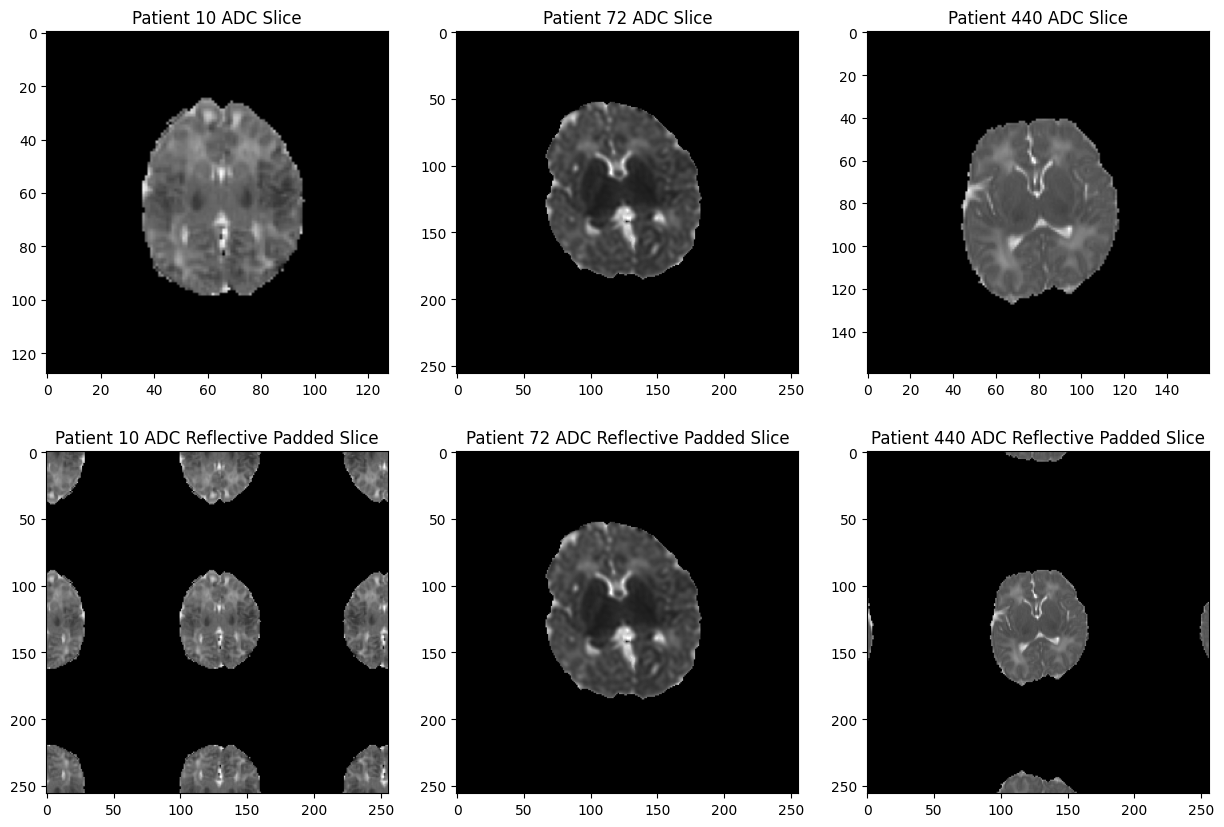

In [ ]:
# Reflective Padding
print(f'Patient 10 ADC Shape: {image_array_adc_010.shape}')
print(f'Patient 72 ADC Shape: {image_array_clipped_adc_072.shape}')
print(f'Patient 440 ADC Shape: {image_array_adc_440.shape}')

image_array_adc_010_reflect = reflective_padding(image_array_adc_010)
image_array_adc_072_reflect = reflective_padding(image_array_clipped_adc_072)
image_array_adc_440_reflect = reflective_padding(image_array_adc_440)

print(f'Patient 10 ADC Reflective Padded Shape: {image_array_adc_010_reflect.shape}')
print(f'Patient 72 ADC Reflective Padded Shape: {image_array_adc_072_reflect.shape}')
print(f'Patient 440 ADC Reflective Padded Shape: {image_array_adc_440_reflect.shape}')

# Plotting the before and after Reflective Padded ADC Slice
plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow(image_array_adc_010[image_array_adc_010.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 10 ADC Slice")
plt.subplot(232)
plt.imshow(image_array_clipped_adc_072[image_array_clipped_adc_072.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 72 ADC Slice")
plt.subplot(233)
plt.imshow(image_array_adc_440[image_array_adc_440.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 440 ADC Slice")

plt.subplot(234)
plt.imshow(image_array_adc_010_reflect[image_array_adc_010_reflect.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 10 ADC Reflective Padded Slice")
plt.subplot(235)
plt.imshow(image_array_adc_072_reflect[image_array_adc_072_reflect.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 72 ADC Reflective Padded Slice")
plt.subplot(236)
plt.imshow(image_array_adc_440_reflect[image_array_adc_440_reflect.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 440 ADC Reflective Padded Slice")
plt.show()

Patient 10 ADC Shape: (23, 128, 128)
Patient 72 ADC Shape: (45, 256, 256)
Patient 440 ADC Shape: (20, 160, 160)
Patient 10 ADC Replicate Padded Shape: (23, 256, 256)
Patient 72 ADC Replicate Padded Shape: (45, 256, 256)
Patient 440 ADC Replicate Padded Shape: (20, 256, 256)


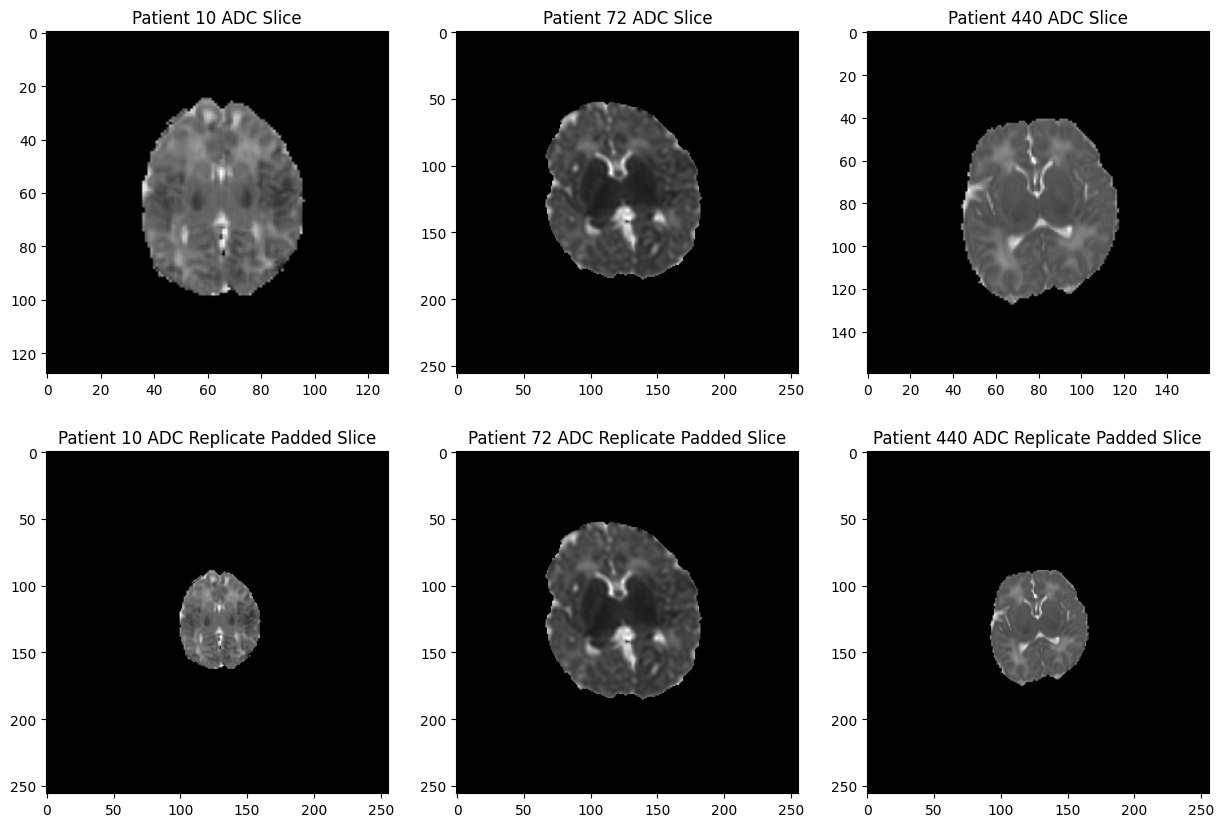

In [ ]:
# Replicate Padding
print(f'Patient 10 ADC Shape: {image_array_adc_010.shape}')
print(f'Patient 72 ADC Shape: {image_array_clipped_adc_072.shape}')
print(f'Patient 440 ADC Shape: {image_array_adc_440.shape}')

image_array_adc_010_replicate = replicate_padding(image_array_adc_010)
image_array_adc_072_replicate = replicate_padding(image_array_clipped_adc_072)
image_array_adc_440_replicate = replicate_padding(image_array_adc_440)

print(f'Patient 10 ADC Replicate Padded Shape: {image_array_adc_010_replicate.shape}')
print(f'Patient 72 ADC Replicate Padded Shape: {image_array_adc_072_replicate.shape}')
print(f'Patient 440 ADC Replicate Padded Shape: {image_array_adc_440_replicate.shape}')

# Plotting the before and after Replicate Padded ADC Slice
plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow(image_array_adc_010[image_array_adc_010.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 10 ADC Slice")
plt.subplot(232)
plt.imshow(image_array_clipped_adc_072[image_array_clipped_adc_072.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 72 ADC Slice")
plt.subplot(233)
plt.imshow(image_array_adc_440[image_array_adc_440.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 440 ADC Slice")

plt.subplot(234)
plt.imshow(image_array_adc_010_replicate[image_array_adc_010_replicate.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 10 ADC Replicate Padded Slice")
plt.subplot(235)
plt.imshow(image_array_adc_072_replicate[image_array_adc_072_replicate.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 72 ADC Replicate Padded Slice")
plt.subplot(236)
plt.imshow(image_array_adc_440_replicate[image_array_adc_440_replicate.shape[0] // 2, :, :], cmap='gray')
plt.title("Patient 440 ADC Replicate Padded Slice")
plt.show()

Augmentation

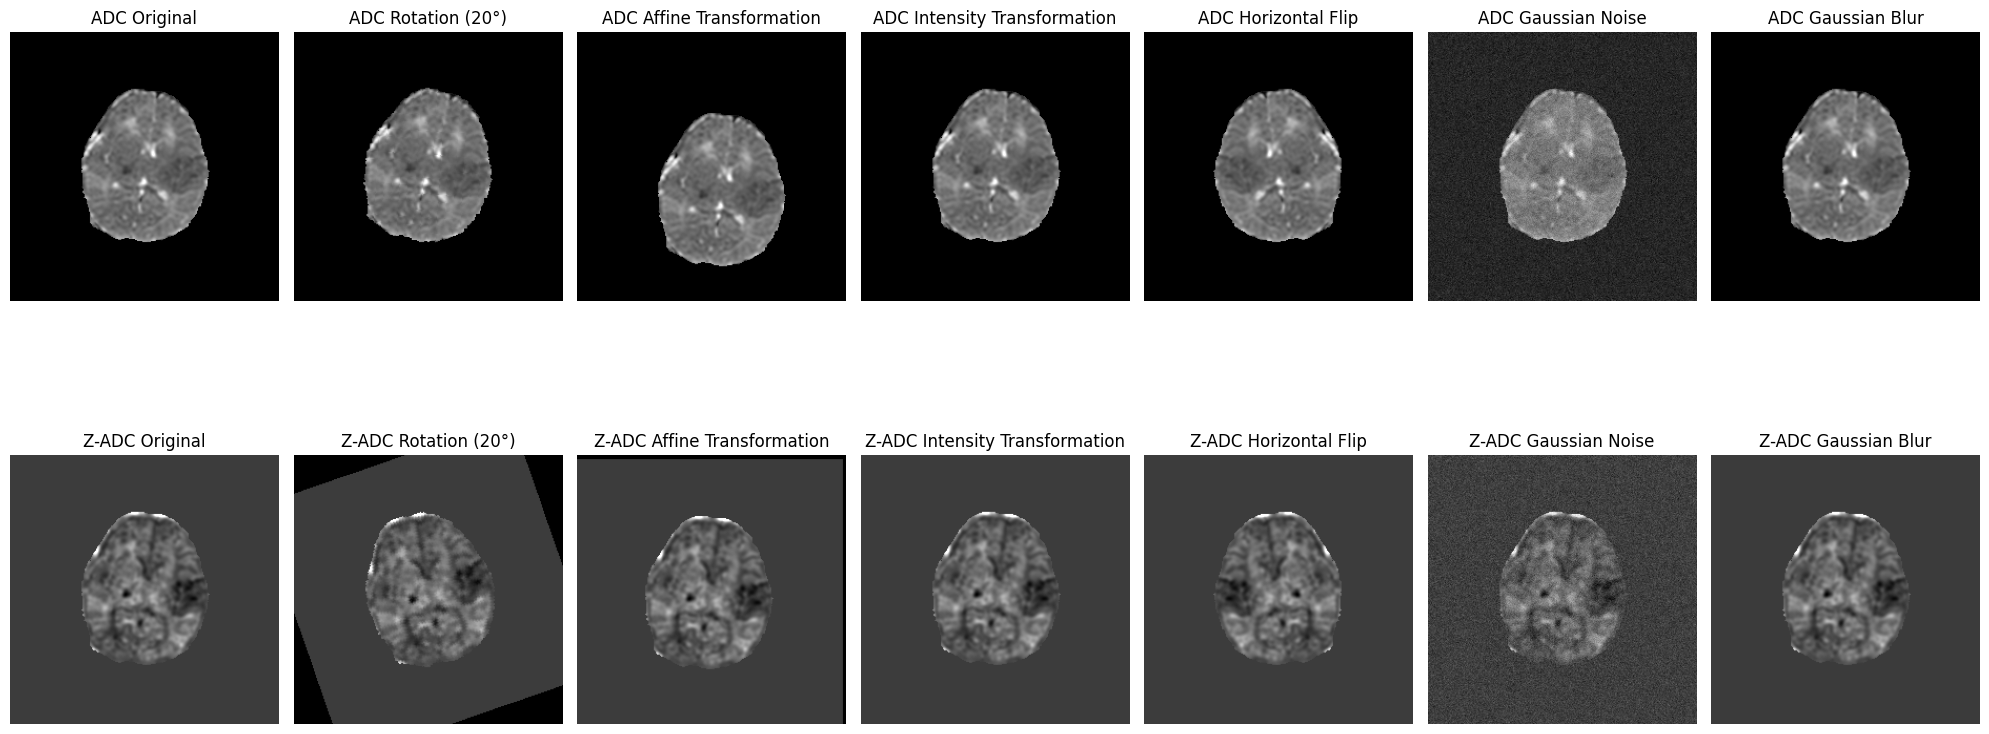

In [ ]:
# Convert normalized slices to PyTorch tensor for augmentation
adc_tensor = torch.from_numpy(slice_adc_normalized).float().unsqueeze(0).unsqueeze(0)
zadc_tensor = torch.from_numpy(slice_zadc).float().unsqueeze(0).unsqueeze(0)

# Define individual augmentations
augmentations = {
    "Rotation (20°)": transforms.RandomRotation(degrees=20, fill=0.),
    "Affine Transformation": transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), fill=0.),
    # "Rotation (20°)": transforms.RandomRotation(degrees=20),
    # "Affine Transformation": transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    "Intensity Transformation": transforms.ColorJitter(brightness=0.1, contrast=0.1),
    "Horizontal Flip": transforms.RandomHorizontalFlip(p=1.0),
    "Gaussian Noise": lambda x: x + 0.05 * torch.randn_like(x),
    "Gaussian Blur": transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))
}

# Apply each augmentation separately and plot
fig, axes = plt.subplots(2, len(augmentations) + 1, figsize=(20, 10))

# Plot original images
axes[0, 0].imshow(slice_adc_normalized, cmap='gray')
axes[0, 0].set_title("ADC Original")
axes[0, 0].axis('off')

axes[1, 0].imshow(slice_zadc, cmap='gray')
axes[1, 0].set_title("Z-ADC Original")
axes[1, 0].axis('off')

# Plot augmented images
for i, (aug_name, aug) in enumerate(augmentations.items(), start=1):
    # Apply augmentation
    if callable(aug):  # For Gaussian Noise
        adc_augmented = aug(adc_tensor)
        zadc_augmented = aug(zadc_tensor)
    else:
        adc_augmented = aug(adc_tensor)
        zadc_augmented = aug(zadc_tensor)

    # Convert back to NumPy for visualization
    adc_augmented_np = adc_augmented.squeeze().numpy()
    zadc_augmented_np = zadc_augmented.squeeze().numpy()

    # Plot each augmentation result
    axes[0, i].imshow(adc_augmented_np, cmap='gray')
    axes[0, i].set_title(f"ADC {aug_name}")
    axes[0, i].axis('off')

    axes[1, i].imshow(zadc_augmented_np, cmap='gray')
    axes[1, i].set_title(f"Z-ADC {aug_name}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()